### Load libraries

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb
import wandb.sdk

plt.style.use('seaborn-darkgrid')

In [2]:
sys.path.append("../..")
from src.utils import runs_to_df

### Load data

In [3]:
api = wandb.Api()
runs: list[wandb.sdk.wandb_run.Run] = api.runs(
    f"data-frugal-learning/adv-train",
    filters={
        "tags": {
            "$in": [
                "param-scaling-v1",
                "try1.2",
                "try1.2.1",
                "try1.3",
                "smaller-wrns",
            ]
        }
    },
)

df = runs_to_df(runs)
# df = df[df.state == "finished"]
df = df.query("n_train == 5942688 & do_adv_training")
len(df)


30

### Plots

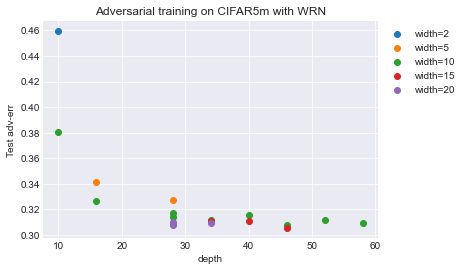

In [4]:
for w in sorted(df.width.unique()):
    cdf = df[df.width == w]

    plt.scatter(cdf.depth, 1 - cdf.test_acc, label=f"width={w}")

plt.title("Adversarial training on CIFAR5m with WRN")
plt.xlabel("depth")
plt.ylabel("Test adv-err")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));

The above plot suggests that ~600 layers is enough to get 0.1 adv-error.
A 600 layer net should take ~60 days to train.

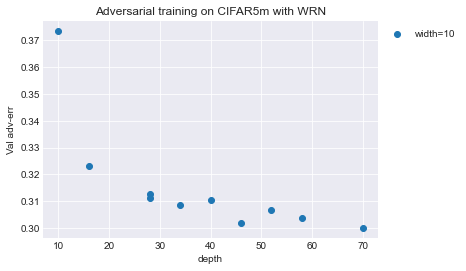

In [5]:
for w in [10]:
    cdf = df[(df.width == w)]

    plt.scatter(cdf.depth, 1 - cdf.val_acc_max, label=f"width={w}")

plt.title("Adversarial training on CIFAR5m with WRN")
plt.xlabel("depth")
plt.ylabel("Val adv-err")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));

The validation loss suggests we need a WRN-832-10 in order to get 10% adversarial validation error.
This would have roughly 1.3 billion parameters.